In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

In [3]:
equities=pd.read_csv('EQUITY_L.csv')
equities

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,BE,03-MAY-1995,10,1,INE253B01015,10
2,360ONE,360 ONE WAM LIMITED,EQ,19-SEP-2019,1,1,INE466L01038,1
3,3IINFOLTD,3i Infotech Limited,EQ,22-OCT-2021,10,1,INE748C01038,10
4,3MINDIA,3M India Limited,EQ,13-AUG-2004,10,1,INE470A01017,10
...,...,...,...,...,...,...,...,...
1977,ZOTA,Zota Health Care LImited,EQ,19-AUG-2019,10,1,INE358U01012,10
1978,ZUARI,Zuari Agro Chemicals Limited,EQ,27-NOV-2012,10,1,INE840M01016,10
1979,ZUARIIND,ZUARI INDUSTRIES LIMITED,EQ,12-APR-1995,10,1,INE217A01012,10
1980,ZYDUSLIFE,Zydus Lifesciences Limited,EQ,18-APR-2000,1,1,INE010B01027,1


In [4]:
equities.SYMBOL

0        20MICRONS
1       21STCENMGM
2           360ONE
3        3IINFOLTD
4          3MINDIA
           ...    
1977          ZOTA
1978         ZUARI
1979      ZUARIIND
1980     ZYDUSLIFE
1981     ZYDUSWELL
Name: SYMBOL, Length: 1982, dtype: object

In [ ]:
for name in equities.SYMBOL:
    try:
        data=yf.download(f"{name}.NS")
        data.to_csv(f"./Equities/{name}.csv")
    except Exceptions as e:
        print(name + " gave exception :/n"+ e)

In [7]:
data=pd.read_csv("./Equities/RELIANCE.csv",parse_dates=['Date'],index_col='Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,14.638248,14.716795,14.541850,14.691803,1.829960,52060684
1996-01-02,14.656100,14.727506,14.470444,14.577553,1.815730,84371654
1996-01-03,14.816763,15.491551,14.656100,14.688232,1.829516,104661939
1996-01-04,14.548991,14.595404,14.356194,14.552561,1.812617,108450132
1996-01-05,14.495436,14.495436,14.327632,14.452592,1.800165,83354233
...,...,...,...,...,...,...
2024-07-01,3125.050049,3158.800049,3111.350098,3120.300049,3120.300049,3862153
2024-07-02,3139.000000,3147.000000,3114.000000,3130.350098,3130.350098,3874623
2024-07-03,3132.649902,3150.000000,3085.550049,3104.850098,3104.850098,4524810


<Axes: xlabel='Date'>

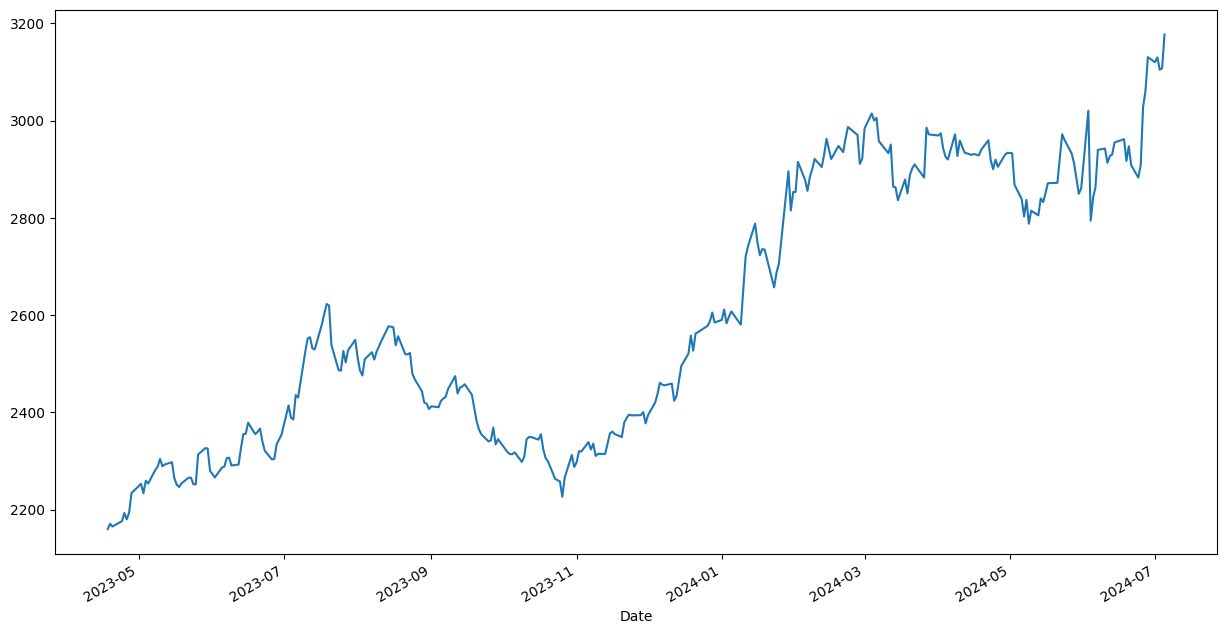

In [9]:
data[-300:].Close.plot(figsize=(15,8))

In [11]:
data['20MA']=data.Close.rolling(window=20).mean()
data['20MA']

Date
1996-01-01            NaN
1996-01-02            NaN
1996-01-03            NaN
1996-01-04            NaN
1996-01-05            NaN
                 ...     
2024-07-01    2949.742505
2024-07-02    2955.227515
2024-07-03    2970.742517
2024-07-04    2984.070020
2024-07-05    2999.772522
Name: 20MA, Length: 7160, dtype: float64

In [12]:
data['50MA']=data.Close.rolling(window=50).mean()
data['50MA']

Date
1996-01-01            NaN
1996-01-02            NaN
1996-01-03            NaN
1996-01-04            NaN
1996-01-05            NaN
                 ...     
2024-07-01    2911.563003
2024-07-02    2915.597007
2024-07-03    2918.889009
2024-07-04    2921.856011
2024-07-05    2927.028013
Name: 50MA, Length: 7160, dtype: float64

In [13]:
data['Signal']=0
data['Signal']=np.where(data['20MA']>data['50MA'],1,0)
data['Signal']

Date
1996-01-01    0
1996-01-02    0
1996-01-03    0
1996-01-04    0
1996-01-05    0
             ..
2024-07-01    1
2024-07-02    1
2024-07-03    1
2024-07-04    1
2024-07-05    1
Name: Signal, Length: 7160, dtype: int32

In [14]:
data['Position']=data.Signal.diff()

In [17]:
data['Position'].unique()

array([nan,  0.,  1., -1.])

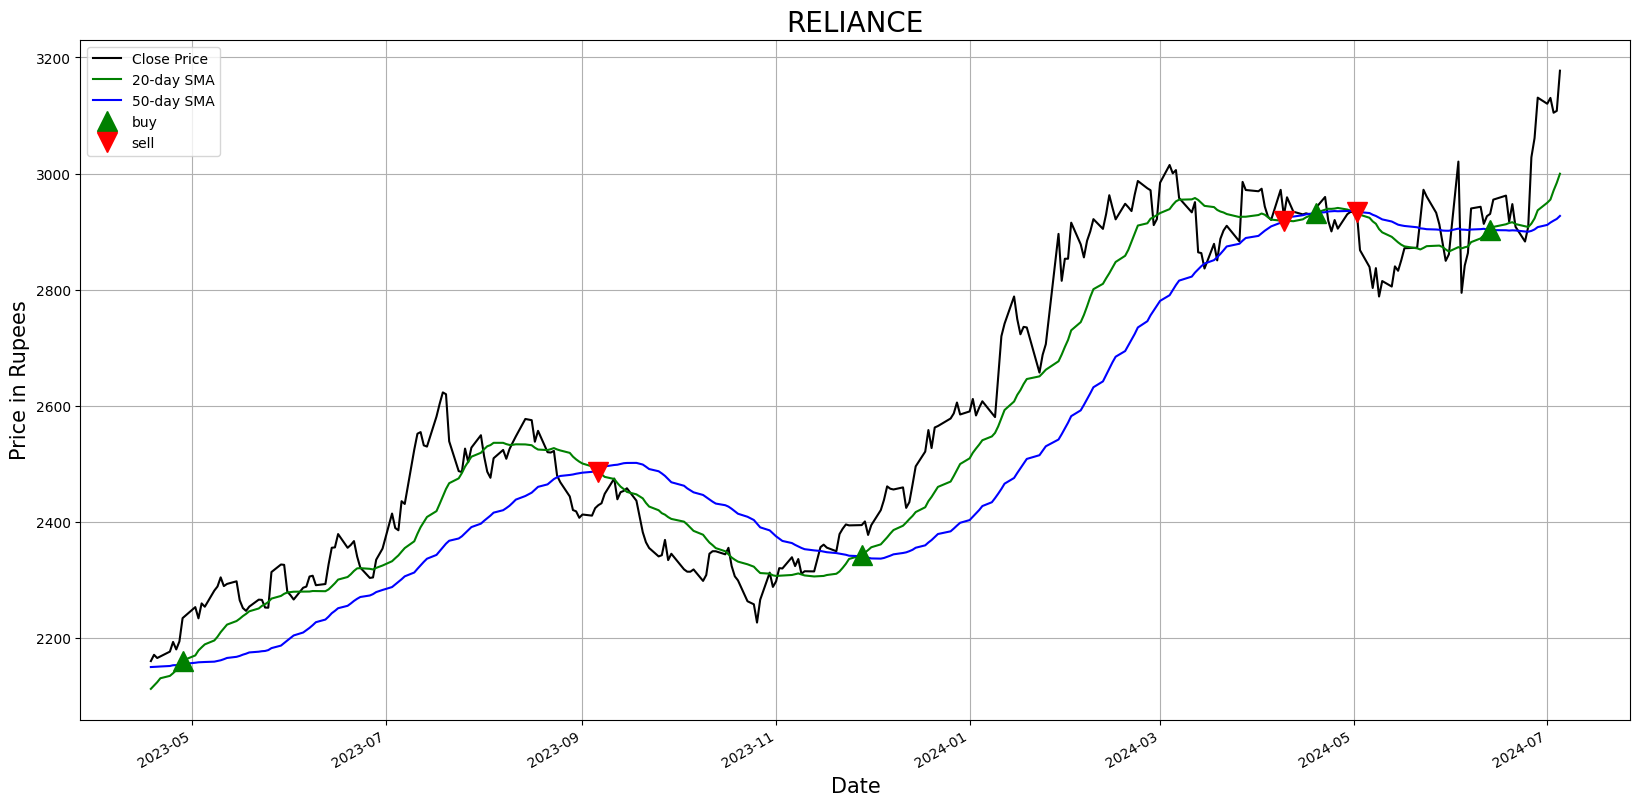

In [15]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data.iloc[-300:]['Close'].plot(color = 'k', label= 'Close Price') 
data.iloc[-300:]['20MA'].plot(color = 'g',label = '20-day SMA') 
data.iloc[-300:]['50MA'].plot(color = 'b', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == 1].index, #x-index
         data.iloc[-300:]['20MA'][data.iloc[-300:]['Position'] == 1], #y-index
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == -1].index, #x-index
         data.iloc[-300:]['20MA'][data.iloc[-300:]['Position'] == -1], #y-index
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('RELIANCE', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [20]:
pip install tabulate

In [23]:
from tabulate import tabulate
df_pos = data.iloc[-300:][(data.iloc[-300:]['Position'] == 1) | (data['Position'] == -1)].copy()
df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2023-04-28 00:00:00 | 2234.12 | Buy        |
| 2023-09-06 00:00:00 | 2428.7  | Sell       |
| 2023-11-28 00:00:00 | 2394.4  | Buy        |
| 2024-04-09 00:00:00 | 2927.3  | Sell       |
| 2024-04-19 00:00:00 | 2940.25 | Buy        |
| 2024-05-02 00:00:00 | 2933.1  | Sell       |
| 2024-06-13 00:00:00 | 2930.5  | Buy        |
+---------------------+---------+------------+


C:\Users\darsh\AppData\Local\Temp\ipykernel_27184\2467225485.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-300:][(data.iloc[-300:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [28]:
def goldencrossover(name):
    data=pd.read_csv(f"./Equities/{name}.csv",parse_dates=['Date'],index_col='Date')
    data['20MA']=data.Close.rolling(window=20).mean()
    data['50MA']=data.Close.rolling(window=50).mean()
    data['Signal']=0
    data['Signal']=np.where(data['20MA']>data['50MA'],1,0)
    data['Position']=data.Signal.diff()
    data['Position'].unique()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    data.iloc[-300:]['Close'].plot(color = 'k', label= 'Close Price') 
    data.iloc[-300:]['20MA'].plot(color = 'g',label = '20-day SMA') 
    data.iloc[-300:]['50MA'].plot(color = 'b', label = '50-day SMA')
    # plot ‘buy’ signals
    plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == 1].index, #x-index
             data.iloc[-300:]['20MA'][data.iloc[-300:]['Position'] == 1], #y-index
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == -1].index, #x-index
             data.iloc[-300:]['20MA'][data.iloc[-300:]['Position'] == -1], #y-index
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title(name, fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    df_pos = data.iloc[-300:][(data.iloc[-300:]['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

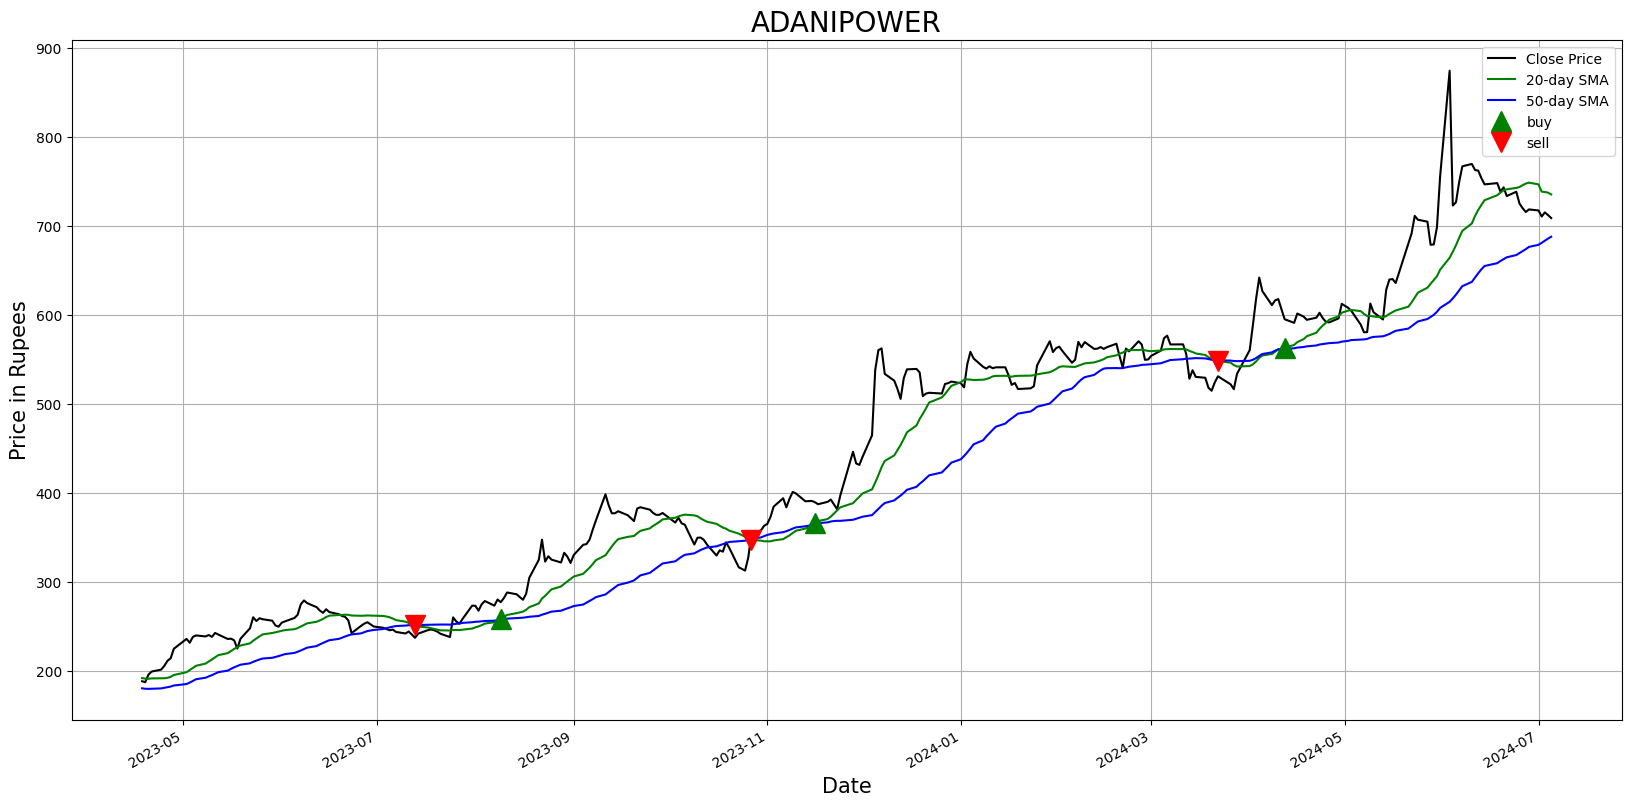

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2023-07-13 00:00:00 |  237.2  | Sell       |
| 2023-08-09 00:00:00 |  277.15 | Buy        |
| 2023-10-27 00:00:00 |  354.15 | Sell       |
| 2023-11-16 00:00:00 |  389.55 | Buy        |
| 2024-03-22 00:00:00 |  531.05 | Sell       |
| 2024-04-12 00:00:00 |  595.2  | Buy        |
+---------------------+---------+------------+


C:\Users\darsh\AppData\Local\Temp\ipykernel_27184\804311373.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-300:][(data.iloc[-300:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [29]:
goldencrossover('ADANIPOWER')